

# **Facial Recognition with VGGFace in Keras**

---


In this lesson, we use **Facial Recognition with VGGFace in Keras** to compare facial similarity. We load a pre-trained model of VGGFace (trainined on thousands of faces) and use it, together with a similarity metric, to define whether two faces are of the same person.

1. Download our data, and import our modules
2. Define our VGGFace Model and load our weights
3. Create our cosine distance function
4. Verify Facial Similarity
5. Facial Recognition with One Shot Learning
6. Test model using your Webcam
7. Test on video from the Friends TV show

Related Paper - https://www.robots.ox.ac.uk/~vgg/publications/2015/Parkhi15/parkhi15.pdf


In [60]:
import os
import gdown
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
%matplotlib inline

In [61]:
# ! gdown --id 1RDw1BqsuZv4auJNv3iJ4ToIOnBq9WsVZ

In [62]:
# ! unzip -q /content/face_recognition.zip

# **Load our VGG Face Weights**

* We don't need to train our model if we can get the already trained 'weights'.

In [63]:

# !gdown --id 14eHppxprE1sCWmnjQ7LuijhAZQlb_Quz

# Define our VGGFace Model and load our weights

In [64]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))
model.load_weights('vgg_face_weights.h5')
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d_52               │ (None, 226, 226, 3)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_53               │ (None, 226, 226, 64)   │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_54               │ (None, 114, 114, 64)   │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_55               │ (None, 114, 114, 128)  │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_56               │ (None, 58, 58, 128)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_57               │ (None, 58, 58, 256)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_58               │ (None, 58, 58, 256)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_59               │ (None, 30, 30, 256)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_60               │ (None, 30, 30, 512)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 145,002,878 (553.14 MB)

 Trainable params: 145,002,878 (553.14 MB)

 Non-trainable params: 0 (0.00 B)

## **Create our cosine distance function**

![Image of Cosine Similarity](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/cosine.JPG)
![Image of Cosine Similarity Formula](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/cosinesim.JPG)

In [65]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

# Our model that outputs the 2,622 embedding vector
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

## **Verify Facial Similarity**

### **Define our verifyFace function where we load to images of faces and compare them.**

* We set **epsilon** to be the threshold of whether our two faces are the same person. Setting a lower value makes it more strict with our face matching.

In [66]:
epsilon = 0.40

def verifyFace(img1, img2):
    # Get embedding/encoding for face1 and face2
    img1_representation = vgg_face_descriptor.predict(preprocess_image('./training_faces/%s' % (img1)))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image('./training_faces/%s' % (img2)))[0,:]

    # Calculate the cosine similarity between the two embeddings
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)

    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img('./training_faces/%s' % (img1)))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img('./training_faces/%s' % (img2)))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)

    print("Cosine similarity: ",cosine_similarity)

    # If similarity score is less than the epsilon threshold
    if(cosine_similarity < epsilon):
        print("They are same person")
    else:
        print("They are not same person!")

# Let's a run a few tests

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


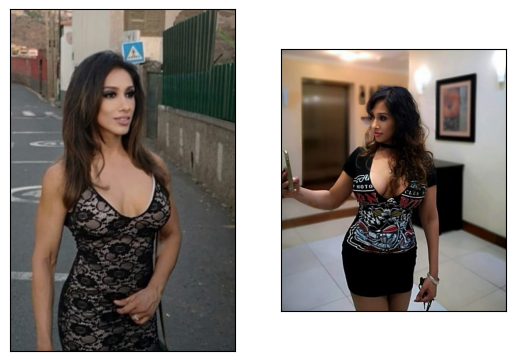

Cosine similarity:  0.14019918
They are same person


In [67]:
verifyFace("Nidia_1.jpg", "Nidia_2.jpg")

In [68]:
verifyFace("Nidia_4.jpg", "jennifer_aniston.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


Cosine similarity:  0.5379396
They are not same person!


# **Facial Recognition with One Shot Learning**
### **Extract faces from pictures of people**

#### **Instrutions:**
1. Place photos of people (one face visible) in the folder called "./people"
2. Replace my photo titled "Rajeev.jpg" with a piture of your face for testing on a webcam
3. Faces are extracted using the haarcascade_frontalface_default detector model
4. Extracted faces are placed in the folder called "./group_of_faces"
5. We are extracting the faces needed for our one-shot learning model, it will load 5 extracted faces

In [69]:
# !gdown --id 1_X-V1Lp6qMAl_-9opsseieprD3Lhdq8U
# !unzip -qq haarcascades.zip
# !rm -rf people/.DS_Store

In [70]:
!rm -rf people/.DS_Store


# Define our imshow function

In [71]:
def imshow(title = "Image", image = None):

  plt.figure(figsize=(10,10))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()



# The code below extracts faces from images and places them in the folder

Collected 4 images


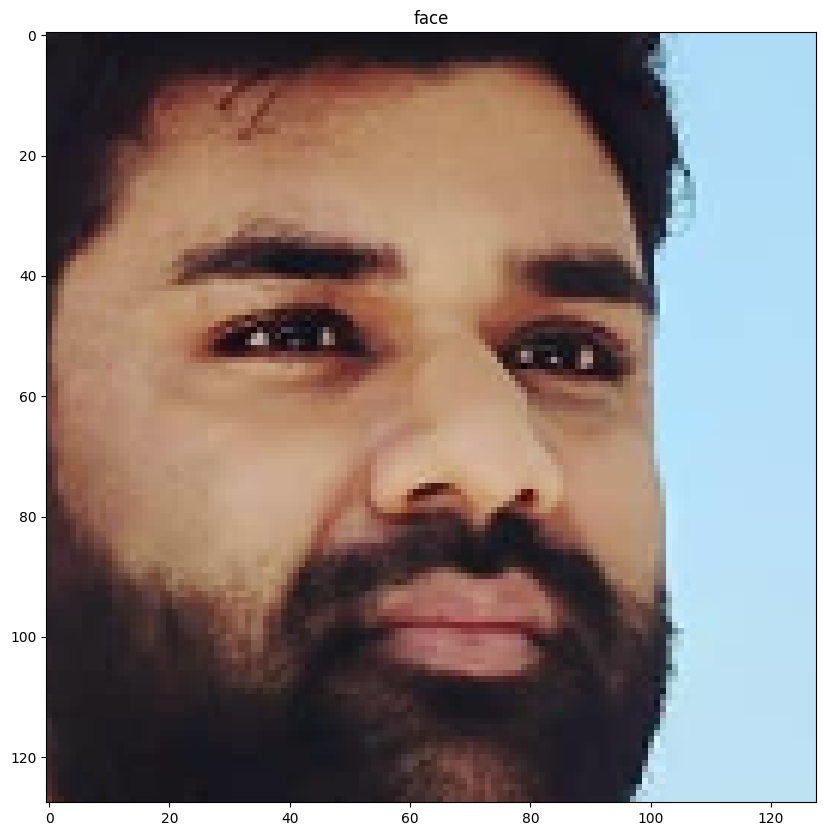

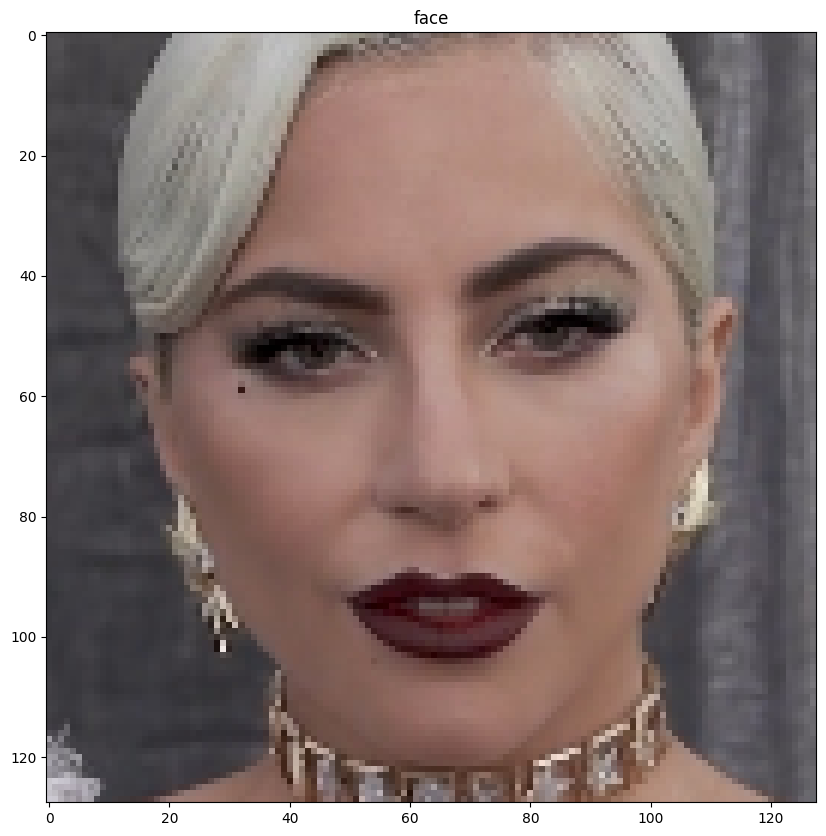

In [72]:

# Create a function to setup the directories we'll be storing our images
def makedir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        return None
    else:
        pass

# Loading out HAARCascade Face Detector
face_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Directory of image of persons we'll be extracting faces frommy
mypath = "./people/"
image_file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print("Collected " + str(len(image_file_names)) + " images")
makedir("./group_of_faces/")

for image_name in image_file_names:
    person_image = cv2.imread(mypath+image_name)
    face_info = face_detector.detectMultiScale(person_image, 1.3, 5)
    for (x,y,w,h) in face_info:
        face = person_image[y:y+h, x:x+w]
        roi = cv2.resize(face, (128, 128), interpolation = cv2.INTER_CUBIC)

    path = "./group_of_faces/" + "face_" + image_name
    cv2.imwrite(path, roi)
    imshow("face", roi)

# **Load our VGGFaceModel**
- This block of code defines the VGGFace model (which we use later) and loads the model

In [73]:

def preprocess_image(image_path):
    """Loads image from path and resizes it"""
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [74]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))
model.load_weights("/content/vgg_face_weights.h5")

vgg_face_descriptor=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)
model=vgg_face_descriptor
model.summary()
#

Model: "functional_233"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_65               │ (None, 226, 226, 3)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_66               │ (None, 226, 226, 64)   │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_67               │ (None, 114, 114, 64)   │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_68               │ (None, 114, 114, 128)  │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_69               │ (None, 58, 58, 128)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_70               │ (None, 58, 58, 256)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_71               │ (None, 58, 58, 256)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_72               │ (None, 30, 30, 256)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_73               │ (None, 30, 30, 512)    │             

 Total params: 145,002,878 (553.14 MB)

 Trainable params: 145,002,878 (553.14 MB)

 Non-trainable params: 0 (0.00 B)

## **Test model using your Webcam**
* This code looks up the faces you extracted in the "group_of_faces" folder and uses the similarity (Cosine Similarity) to detect which faces is most similar to the one being extracted with your webcam.

In [75]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


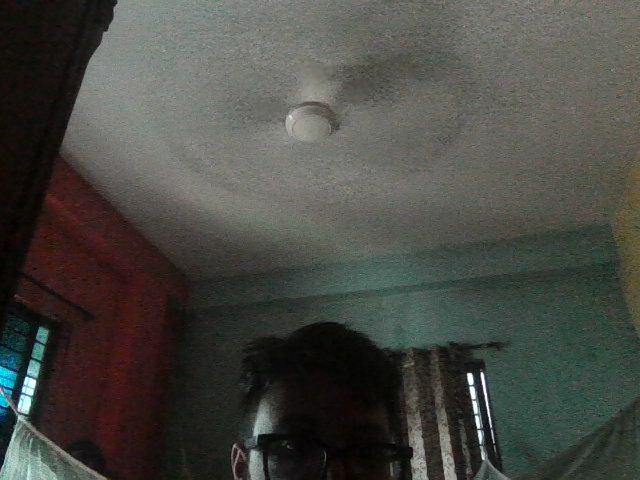

In [76]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Files in directory: ['face_nidia2.jpg', 'face_rajeev.jpg', 'face_ladygaga.jpg', 'face_jlo.jpg']
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step
Face representations retrieved successfully
Known faces: dict_keys(['face_nidia2', 'face_rajeev', 'face_ladygaga', 'face_jlo'])
Original image shape: (1027, 738, 3)
Resized image shape: (512, 512, 3)
Detected faces: 1
Face coordinates: (x=163, y=46, w=184, h=184)
Rectangle drawn
Detected face shape after resize: (224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
Captured representation shape: (2622,)
Representation shape for face_nidia2: (2622,)
Similarity for face_nidia2: 0.561730146408081
Representation shape for face_rajeev: (2622,)
Similarity for face_rajeev: 0.7250843048095703
Representation shape for face_ladygaga: (2622,)
Similarity for face_ladygaga: 0.584324300289154
Representation shape for face_jlo: (2622,)
Similarity for fac

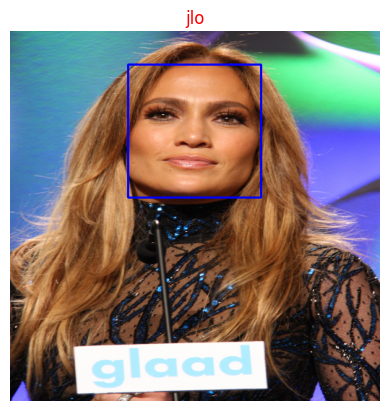

In [77]:
import cv2
import numpy as np
from os import listdir
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load known faces
people_pictures = "/content/group_of_faces/"  # Full path for Colab
all_people_faces = dict()

# List files in the directory
try:
    files = listdir(people_pictures)
    print("Files in directory:", files)
except Exception as e:
    print(f"Error accessing directory {people_pictures}: {e}")
    raise

for file in files:
    person_face, extension = file.split(".")
    try:
        img_path = f'/content/group_of_faces/{person_face}.jpg'
        all_people_faces[person_face] = model.predict(preprocess_image(img_path))[0, :]
    except Exception as e:
        print(f"Error processing {file}: {e}")
print("Face representations retrieved successfully")
print("Known faces:", all_people_faces.keys())

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

# Load the image
img = cv2.imread('/content/training_faces/jlo.jpg')
if img is None:
    print("Error: Could not load image")
    raise Exception("Image loading failed")
print("Original image shape:", img.shape)

# Resize the image to 512x512 (4x larger)
img = cv2.resize(img, (512, 512))
print("Resized image shape:", img.shape)

# Detect faces with adjusted parameters
faces = face_detector.detectMultiScale(img, 1.1, 3)
print("Detected faces:", len(faces))

# Variable to store the detected label
detected_label = "No face detected"

for (x, y, w, h) in faces:
    print(f"Face coordinates: (x={x}, y={y}, w={w}, h={h})")
    # Draw rectangle
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    print("Rectangle drawn")

    detected_face = img[int(y):int(y+h), int(x):int(x+w)]  # Crop face
    detected_face = cv2.resize(detected_face, (224, 224))  # Resize to 224x224 for model input
    print("Detected face shape after resize:", detected_face.shape)

    # Preprocess face
    img_pixels = image.img_to_array(detected_face)
    img_pixels = np.expand_dims(img_pixels, axis=0) / 255.0

    # Get face embedding
    captured_representation = model.predict(img_pixels)[0, :]
    print("Captured representation shape:", captured_representation.shape)

    found = 0
    for person_name, representation in all_people_faces.items():
        print(f"Representation shape for {person_name}:", representation.shape)
        similarity = findCosineSimilarity(representation, captured_representation)
        print(f"Similarity for {person_name}: {similarity}")
        if similarity < 0.35:
            detected_label = person_name[5:]  # Store the detected name (e.g., "ladygaga")
            found = 1
            break

    if found == 0:
        detected_label = "unknown"

# Save the image
cv2.imwrite('output.jpg', img)
print("Image saved as output.jpg")

# Display using matplotlib for Colab with the detected label as the title
plt.title(detected_label, fontsize=12, color='red')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


## **Test on video from the Friends TV show**

Since we're using the Friends TV Series characters, let's extract the faces from the images I placed in the "./friends" folder

In [78]:
!find . -name '.DS_Store' -type f -delete

Collected image names


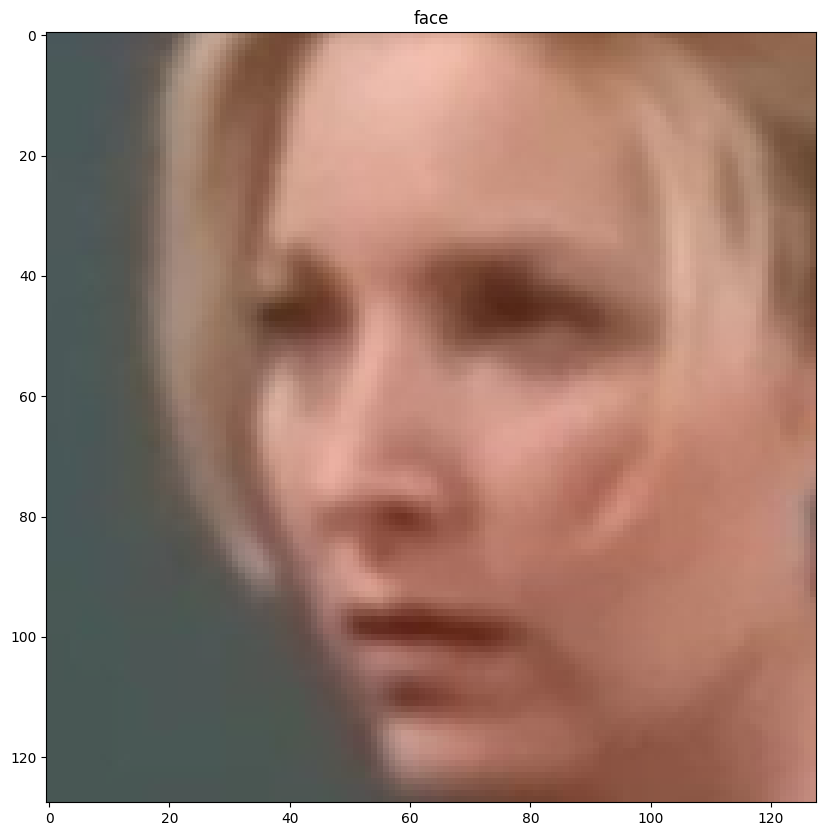

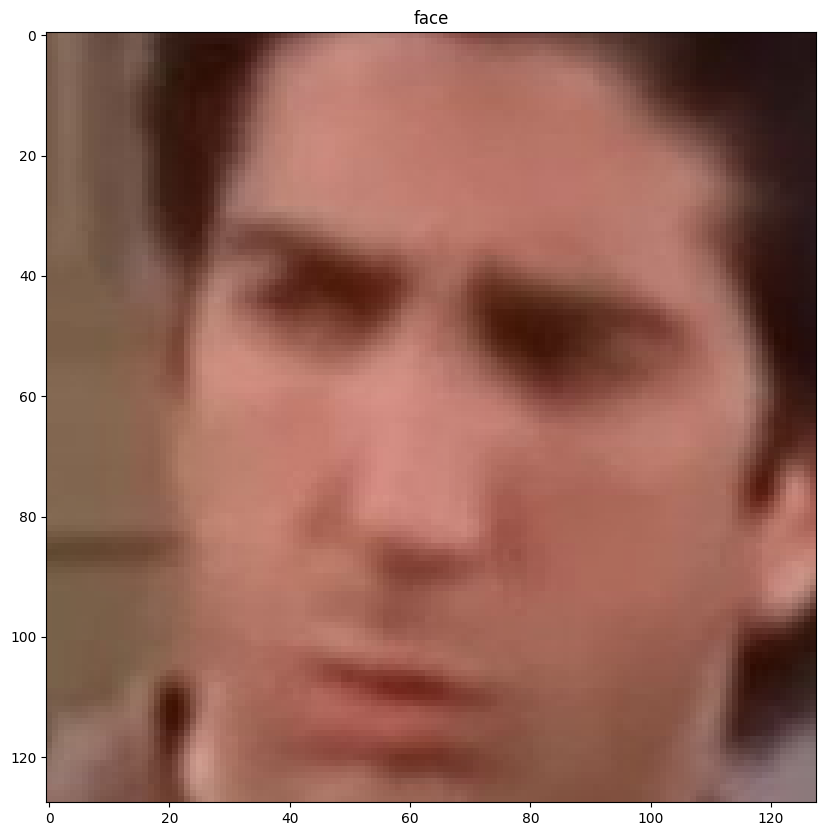

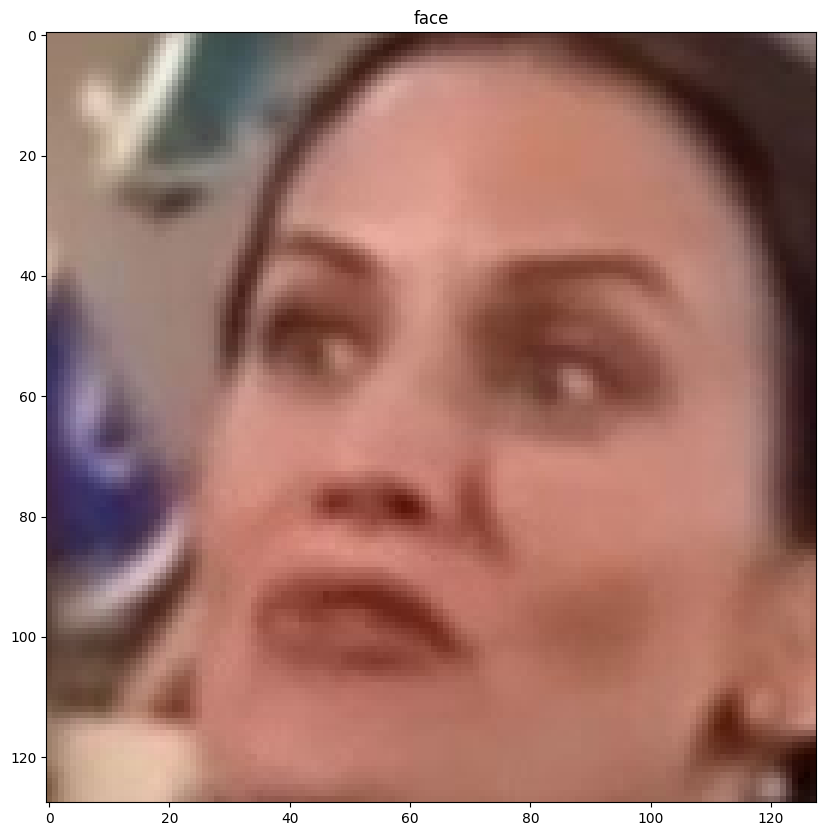

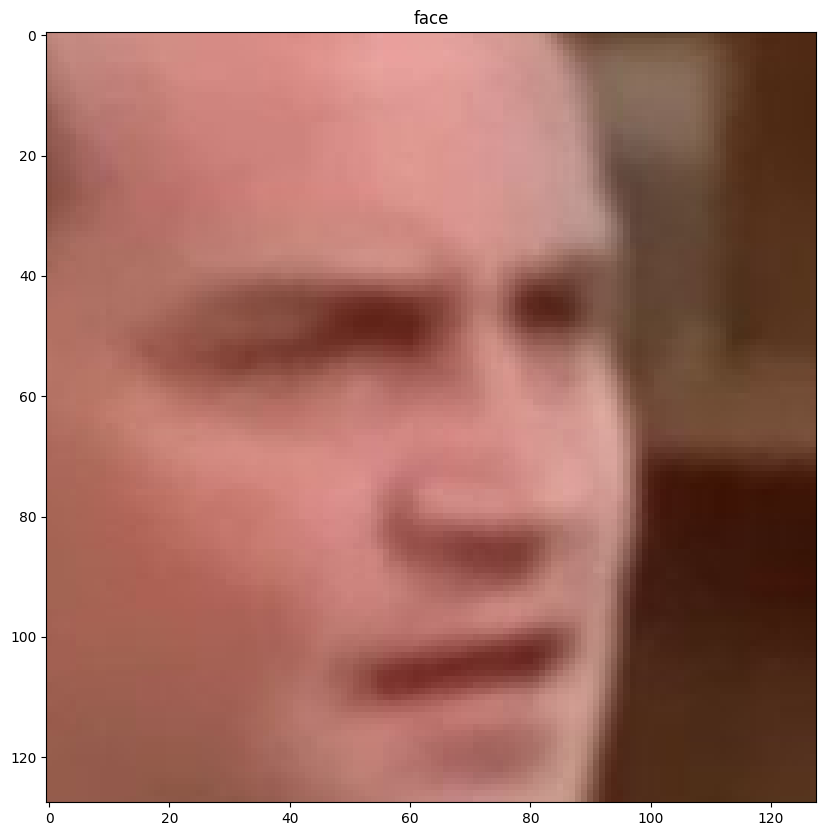

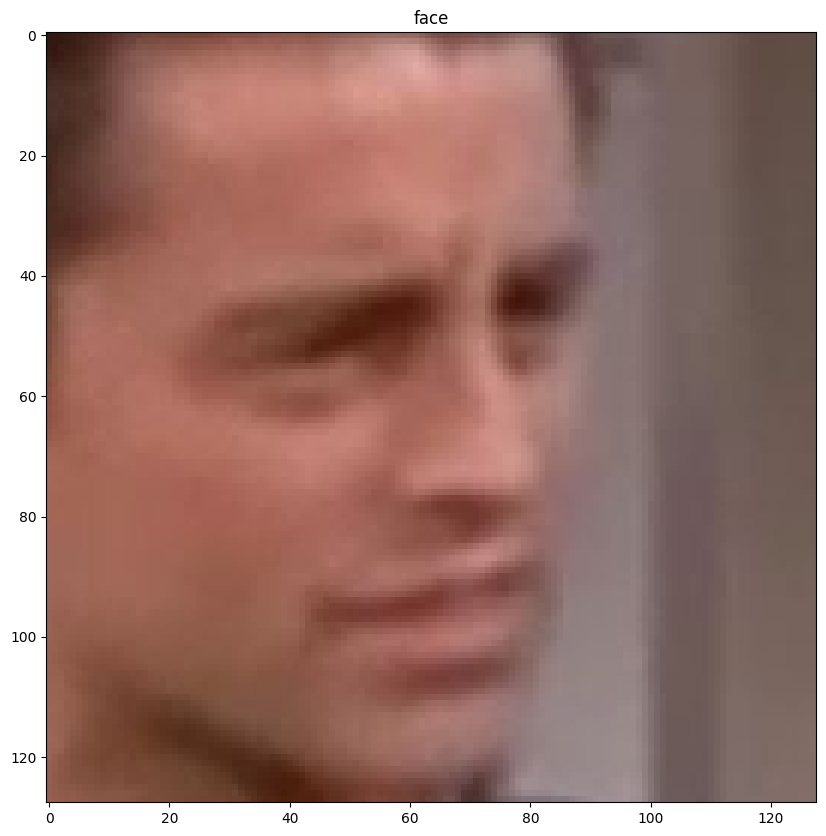

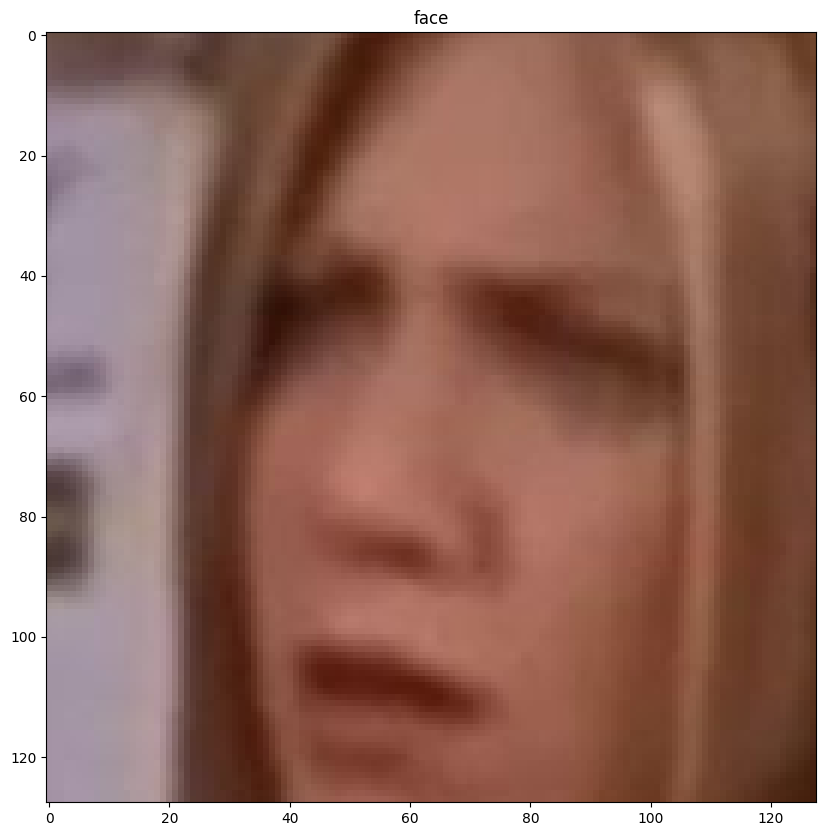

In [79]:

# Loading out HAARCascade Face Detector
face_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Directory of image of persons we'll be extracting faces frommy
mypath = "./friends/"
image_file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print("Collected image names")
makedir("friends_faces/")

for image_name in image_file_names:
    person_image = cv2.imread(mypath+image_name)
    face_info = face_detector.detectMultiScale(person_image, 1.3, 5)
    for (x,y,w,h) in face_info:
        face = person_image[y:y+h, x:x+w]
        roi = cv2.resize(face, (128, 128), interpolation = cv2.INTER_CUBIC)
    path = "friends_faces/" + "face_" + image_name
    cv2.imwrite(path, roi)
    imshow("face", roi)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 628ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
Face representations retrieved successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


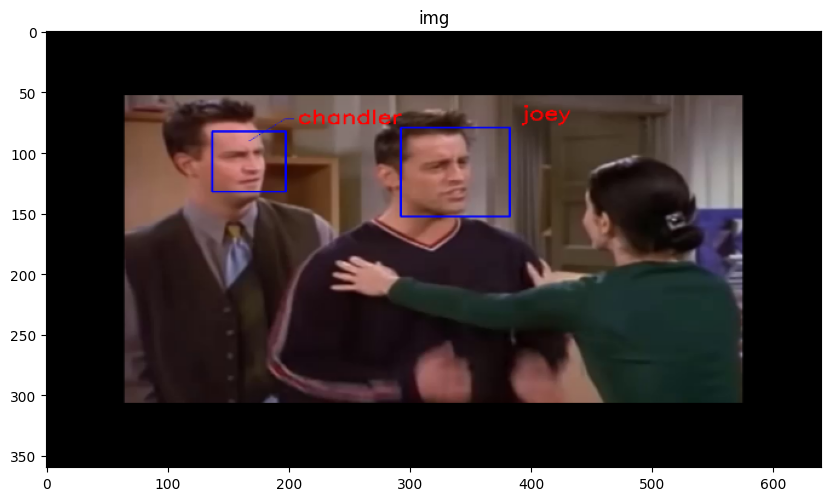

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


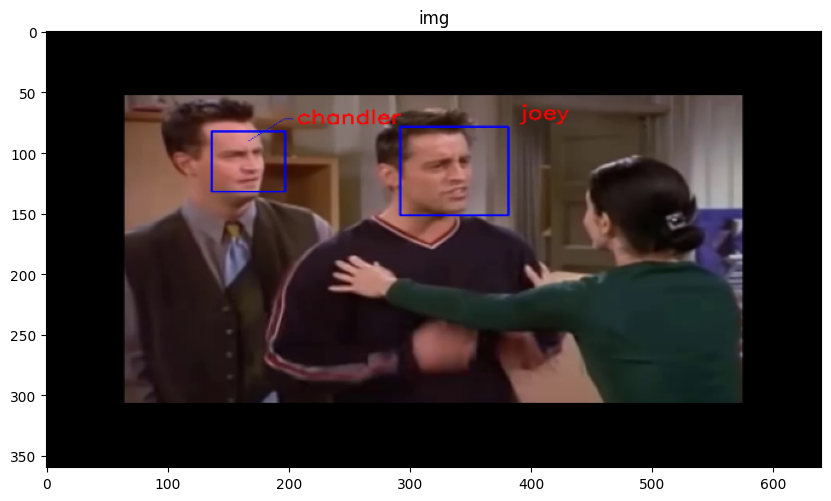

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


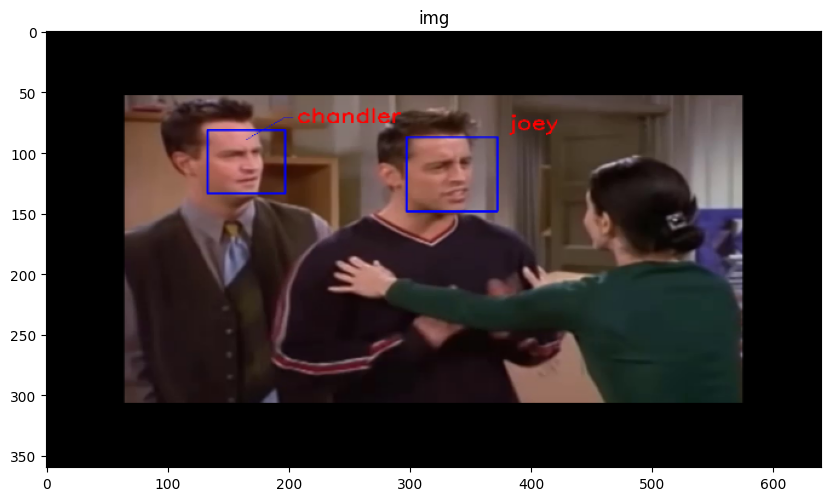

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


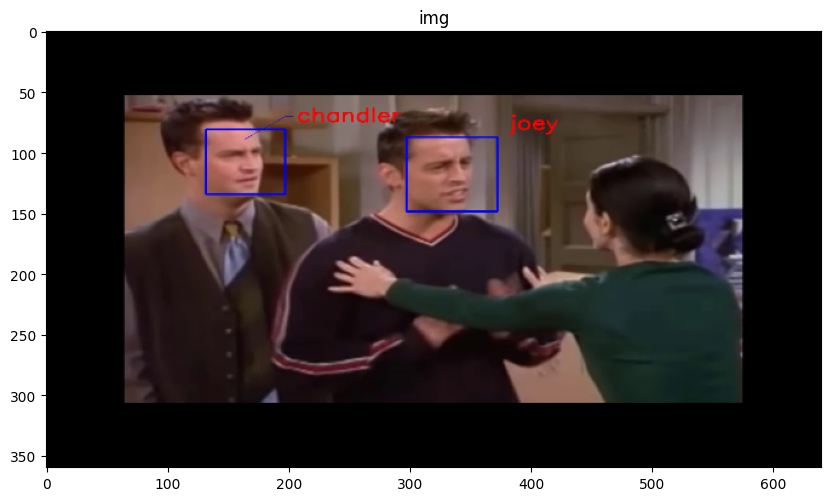

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


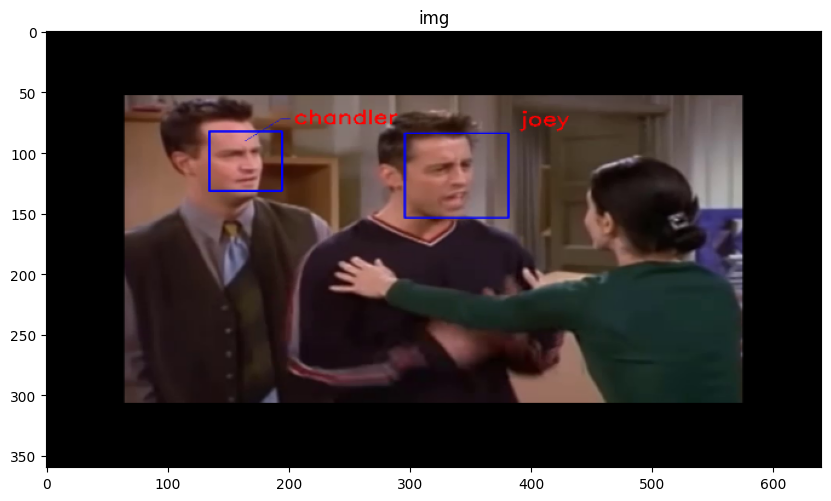

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


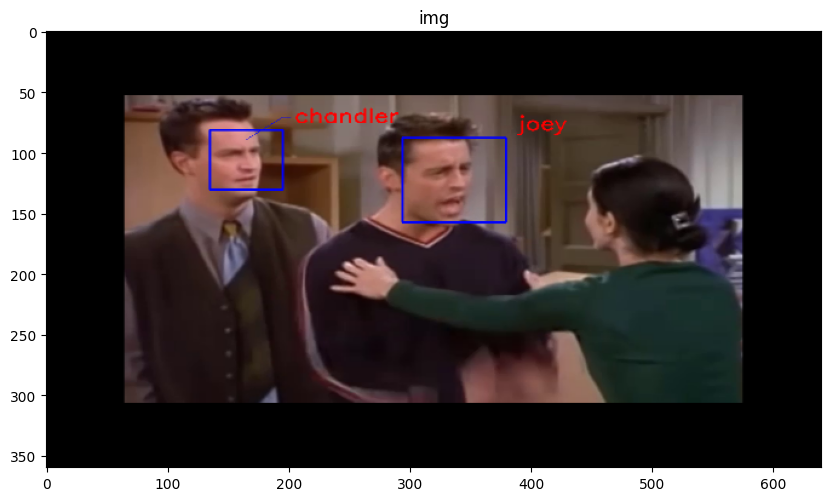

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


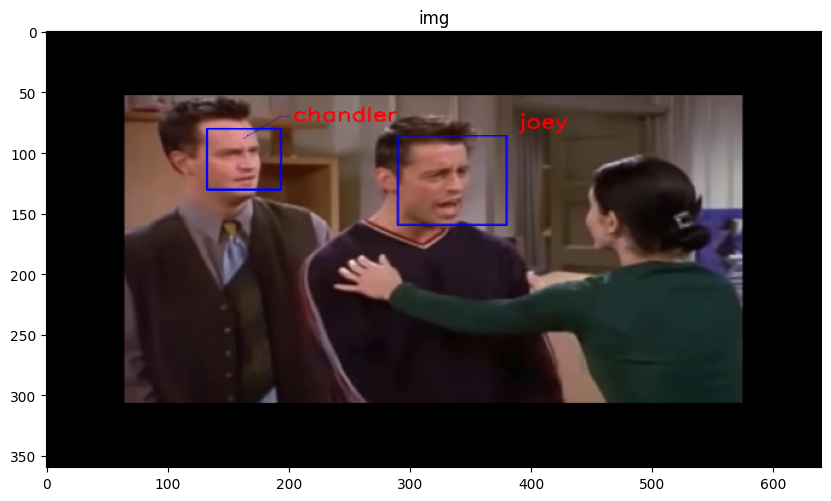

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


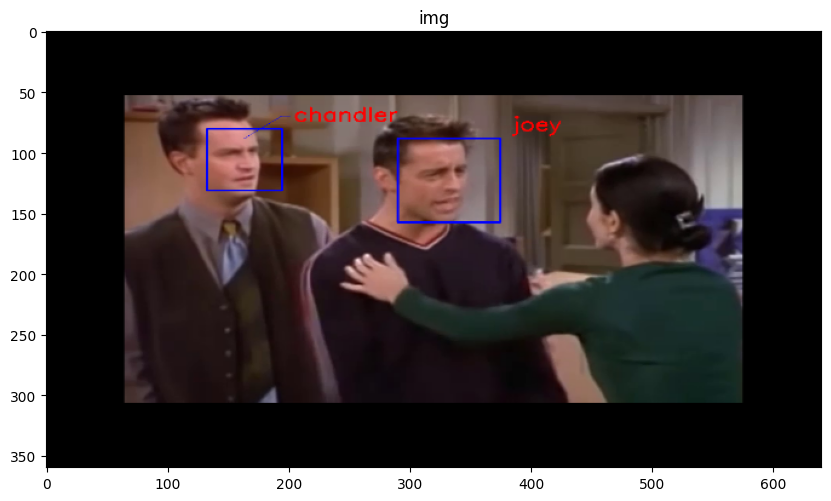

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


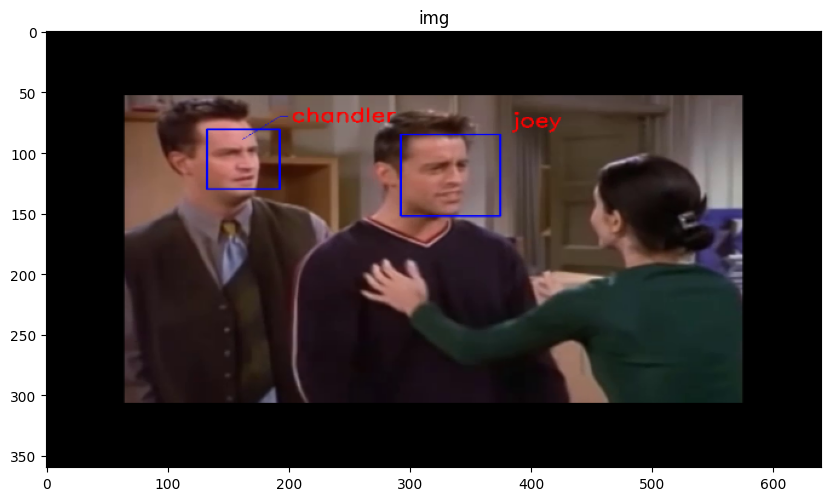

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


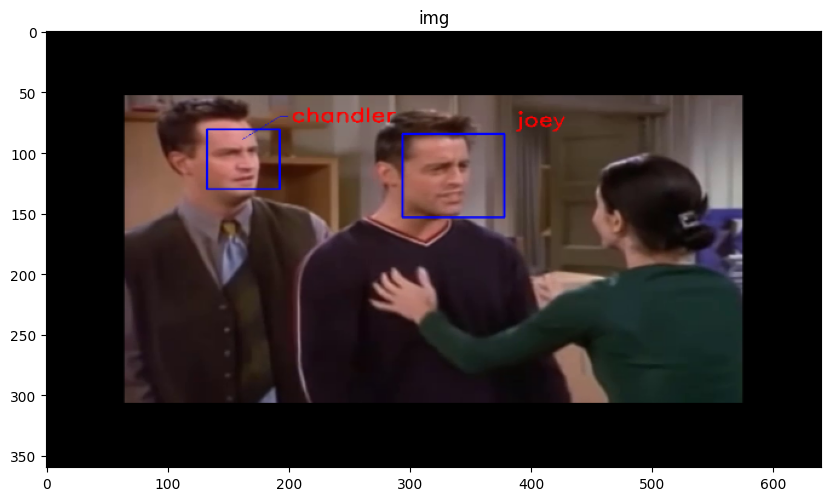

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


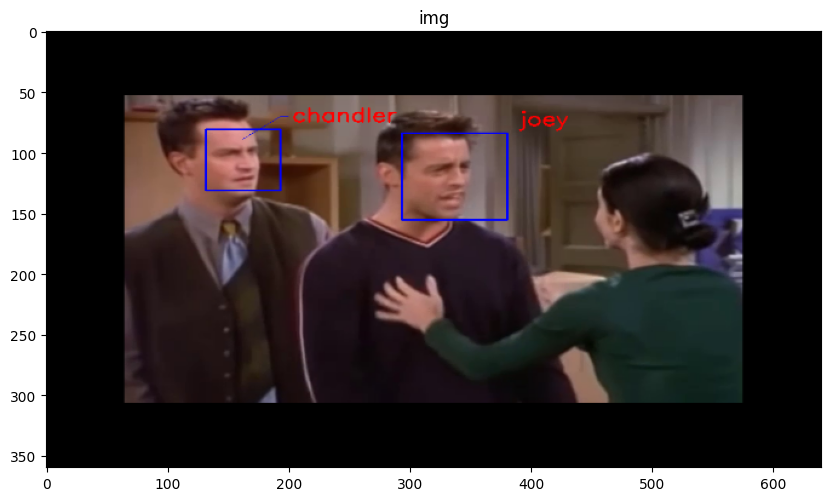

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


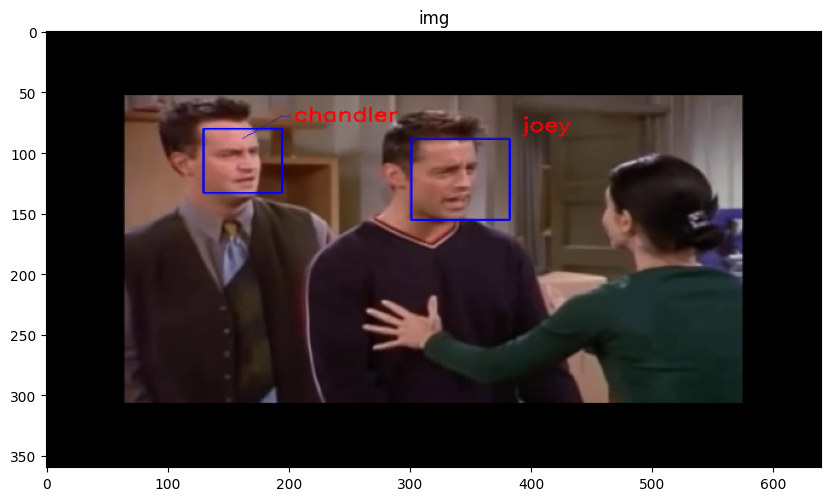

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


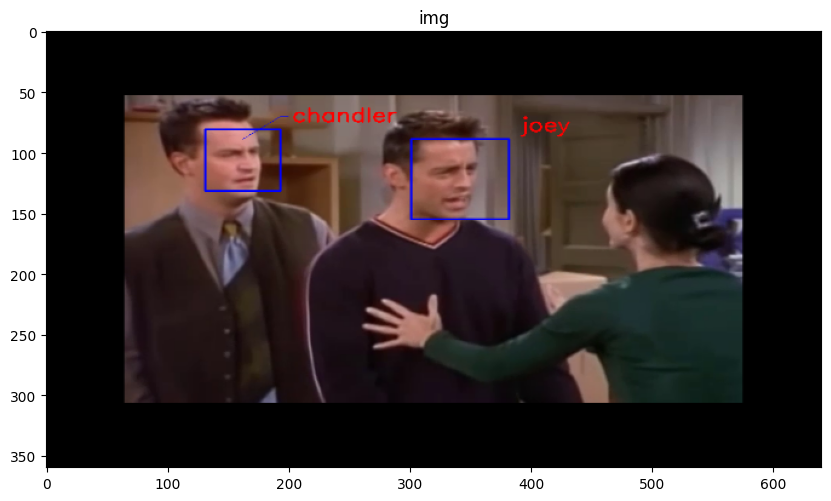

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


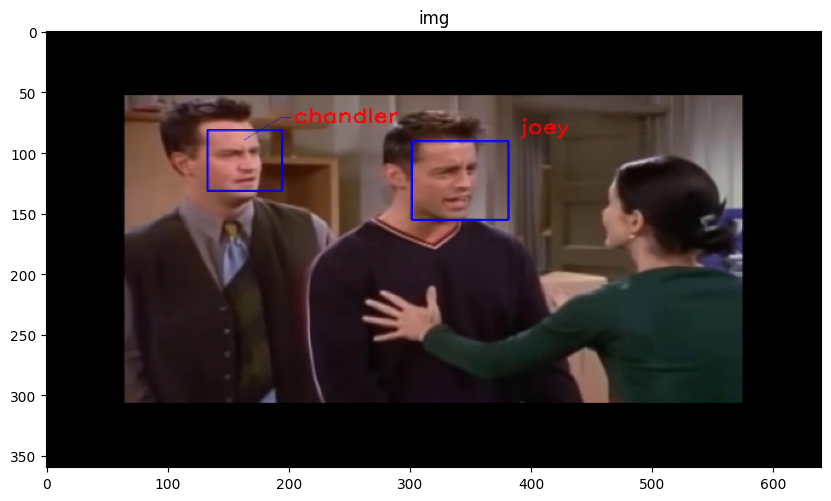

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step

In [ ]:
#points to your extracted faces
people_pictures = "./friends_faces/"

all_people_faces = dict()

for file in listdir(people_pictures):
    person_face, extension = file.split(".")
    try:
      all_people_faces[person_face] = model.predict(preprocess_image('./friends_faces/%s.jpg' % (person_face)))[0,:]
    except:
      pass

print("Face representations retrieved successfully")

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

cap = cv2.VideoCapture('Friends.mp4')
frame_count = 0

# Get the height and width of the frame (required to be an integer)
w = int(cap.get(3)) + 200
h = int(cap.get(4)) + 200

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('friends_face_recognition.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

while(True):
  ret, img = cap.read()
  if ret:
    #img = cv2.resize(img, (320, 180)) # Re-size video to as smaller size to improve face detection speed
    img = cv2.copyMakeBorder(img, 100, 100, 100, 100, cv2.BORDER_CONSTANT, value=[0,0,0])
    faces = face_detector.detectMultiScale(img, 1.3, 5)
    frame_count+=1
    for (x,y,w,h) in faces:
      if w > 13:
          cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image

          detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
          detected_face = cv2.resize(detected_face, (224, 224)) #resize to 224x224

          img_pixels = image.img_to_array(detected_face)
          ls = image.img_to_array(detected_face)
          img_pixels = np.expand_dims(img_pixels, axis = 0)
          img_pixels /= 255

          captured_representation = model.predict(img_pixels)[0,:]

          found = 0
          for i in all_people_faces:
            person_name = i
            representation = all_people_faces[i]

            similarity = findCosineSimilarity(representation, captured_representation)
            if(similarity < 0.30):
                cv2.putText(img, person_name[5:], (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                found = 1
                break

            #connect face and text
            cv2.line(img,(int((x+x+w)/2),y+15),(x+w,y-20),(255, 0, 0),1)
            cv2.line(img,(x+w,y-20),(x+w+10,y-20),(255, 0, 0),1)

    imshow('img',cv2.resize(img, (640, 360)))
    # Write the frame into the file 'output.avi'
    out.write(img)
  else:
    break

cap.release()
out.release()